In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
%matplotlib inline
import os
import warnings
import glob
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('노인실태조사임.csv',index_col=0)
df.drop('Self_conf', axis = 1, inplace = True)
df.head()

,Gender,Job,Edu,Health,Earn
0,여자,임금_저숙련,중등,전혀 지장없음,중
1,여자,임금_중숙련,초등,전혀 지장없음,중
2,여자,임금_고숙련,고등,전혀 지장없음,상
3,남자,임금_중숙련,고등,전혀 지장없음,상
4,여자,임금_저숙련,초등,그렇지 않은 편,중


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df1 = pd.read_csv('노인실태조사임.csv', index_col = 0)
df1.drop('Self_conf', axis = 1, inplace = True)

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.isna().sum()

Gender    0
Job       0
Edu       0
Health    0
Earn      0
dtype: int64

In [ ]:
df['Gender'] = np.where(df['Gender'] == '남자', 0, 1)
df['Job']  = np.where(df['Job'] == '비경활', 0,
                np.where(df['Job'] == '은퇴', 1,
                    np.where(df['Job'] == '부분은퇴', 2,
                        np.where(df['Job'] == '임금_고숙련', 3,
                            np.where(df['Job'] == '임금_중숙련', 4,
                                np.where(df['Job'] == '임금_저숙련', 5,
                                    np.where(df['Job'] == '자영업', 6, 7)))))))
df['Edu'] = np.where(df['Edu'] == '초등', 0,
                np.where(df['Edu'] == '중등', 1,
                    np.where(df['Edu'] == '고등', 2, 3)))
df['Health'] = np.where(df['Health'] == '활동에 제한 있음', 0,
                    np.where(df['Health'] == '그렇지 않은 편', 1, 2))
df['Earn'] = np.where(df['Earn'] == '하', 0,
                np.where(df['Earn'] == '중', 1, 2))

In [ ]:
!pip install kmodes

In [ ]:
data_lst = [df]

In [ ]:
df[df.Job == '임금_저숙련']

,Gender,Job,Edu,Health,Earn
0,여자,임금_저숙련,중등,전혀 지장없음,중
4,여자,임금_저숙련,초등,그렇지 않은 편,중
6,여자,임금_저숙련,중등,전혀 지장없음,하
9,여자,임금_저숙련,초등,전혀 지장없음,중
10,남자,임금_저숙련,고등,전혀 지장없음,상
...,...,...,...,...,...
10074,남자,임금_저숙련,고등,전혀 지장없음,중
10085,남자,임금_저숙련,고등,전혀 지장없음,상
10086,남자,임금_저숙련,고등,전혀 지장없음,상
10094,남자,임금_저숙련,초등,그렇지 않은 편,중


In [ ]:
from kmodes.kmodes import KModes

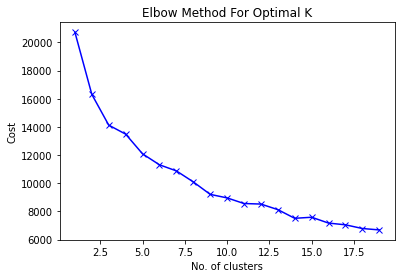

In [ ]:
from kmodes.kmodes import KModes

K = range(1, 20)
cost = []
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = 'random', random_state=2022)
    kmode.fit_predict(df.drop(['Gender'], axis=1))
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title(f'Elbow Method For Optimal K')
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmodes = KModes(n_clusters=6, init='random')
kmodes.fit(df.drop(['Gender'], axis=1))


KModes(init='random', n_clusters=6)

In [ ]:
kmodes.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [ ]:
silhouette_score(df.drop(['Gender'], axis=1), kmodes.labels_)

0.10996940824102318

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    from kmodes.kmodes import KModes
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KModes(n_clusters = n_cluster, max_iter=500, random_state=2022)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

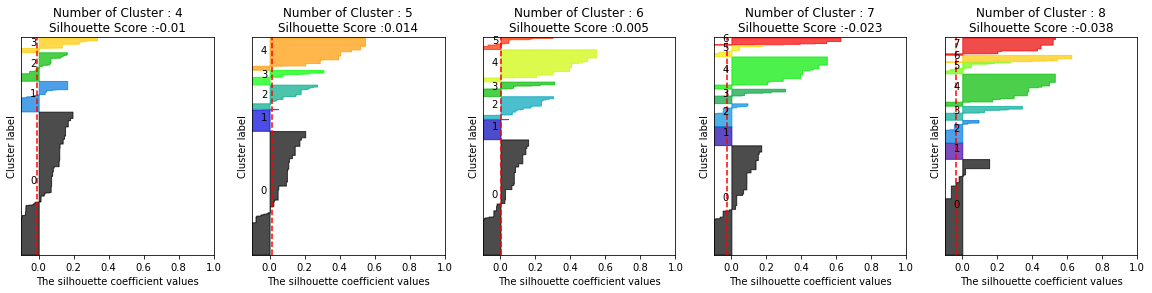

In [ ]:
visualize_silhouette([4,5,6,7,8], df.drop(['Gender'], axis=1))

In [ ]:
data_lst = [df1]

In [ ]:
for data in data_lst:
    kmode = KModes(n_clusters=6, init='random', random_state=2022)
    kmode.fit(data.drop(['Gender'], axis=1))
    data['Cluster'] = kmode.labels_

In [ ]:
df1['Year'] = 2020

## Sequence Analysis

In [ ]:
print('Len of Datas')
for idx, data in enumerate(data_lst):
    print(f'len of {idx}th data:', len(data))

Len of Datas
len of 0th data: 10075


In [ ]:

Static = df1.drop(['Cluster', 'Year'], axis=1)
Static.Gender.value_counts(normalize=True)

여자    0.600397
남자    0.399603
Name: Gender, dtype: float64

In [ ]:
Male = Static[Static['Gender']=='남자']
Female = Static[Static['Gender']=='여자']

In [ ]:
print('Total: \n', Static.Job.value_counts(normalize=True))
print('Male: \n',Male.Job.value_counts(normalize=True))
print('Female: \n', Female.Job.value_counts(normalize=True))

Total: 
 은퇴         0.487146
임금_저숙련     0.242878
비경활        0.139355
임금_중숙련     0.092010
임금_고숙련     0.038015
무급가족종사자    0.000397
자영업        0.000199
Name: Job, dtype: float64
Male: 
 은퇴        0.500000
임금_저숙련    0.273224
임금_중숙련    0.150770
임금_고숙련    0.056135
비경활       0.019374
자영업       0.000497
Name: Job, dtype: float64
Female: 
 은퇴         0.478592
임금_저숙련     0.222681
비경활        0.219210
임금_중숙련     0.052901
임금_고숙련     0.025955
무급가족종사자    0.000661
Name: Job, dtype: float64


In [ ]:
print('Total: \n', Static.Edu.value_counts(normalize=True))
print('Male: \n',Male.Edu.value_counts(normalize=True))
print('Female: \n', Female.Edu.value_counts(normalize=True))

Total: 
 초등        0.451117
고등        0.264119
중등        0.234045
대학교 이상    0.050720
Name: Edu, dtype: float64
Male: 
 고등        0.366120
초등        0.280427
중등        0.256334
대학교 이상    0.097119
Name: Edu, dtype: float64
Female: 
 초등        0.564721
중등        0.219210
고등        0.196231
대학교 이상    0.019838
Name: Edu, dtype: float64


In [ ]:
print('Total: \n', Static.Health.value_counts(normalize=True))
print('Male: \n',Male.Health.value_counts(normalize=True))
print('Female: \n', Female.Health.value_counts(normalize=True))

Total: 
 전혀 지장없음      0.506700
그렇지 않은 편     0.308685
활동에 제한 있음    0.184615
Name: Health, dtype: float64
Male: 
 전혀 지장없음      0.578241
그렇지 않은 편     0.286885
활동에 제한 있음    0.134873
Name: Health, dtype: float64
Female: 
 전혀 지장없음      0.459084
그렇지 않은 편     0.323194
활동에 제한 있음    0.217722
Name: Health, dtype: float64


In [ ]:
print('Total: \n', Static.Earn.value_counts(normalize=True))
print('Male: \n',Male.Earn.value_counts(normalize=True))
print('Female: \n', Female.Earn.value_counts(normalize=True))

Total: 
 중    0.504615
하    0.248734
상    0.246650
Name: Earn, dtype: float64
Male: 
 중    0.429707
상    0.399901
하    0.170392
Name: Earn, dtype: float64
Female: 
 중    0.554472
하    0.300876
상    0.144652
Name: Earn, dtype: float64


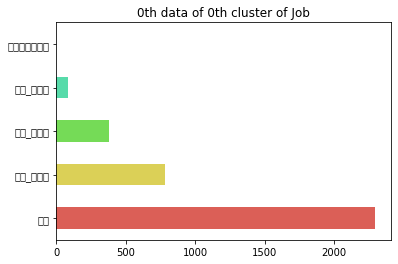

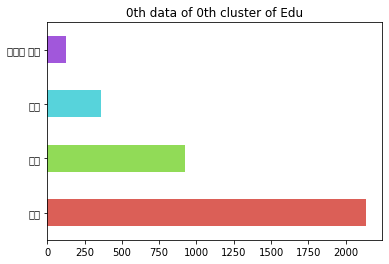

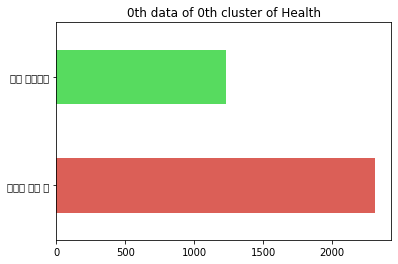

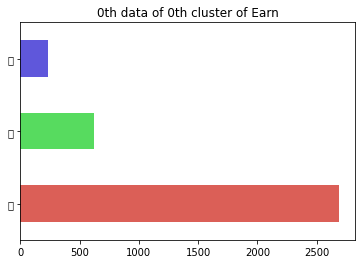

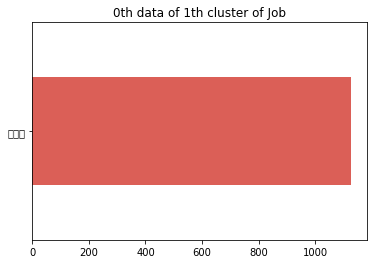

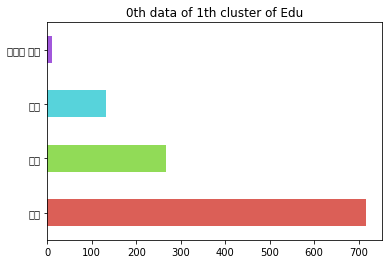

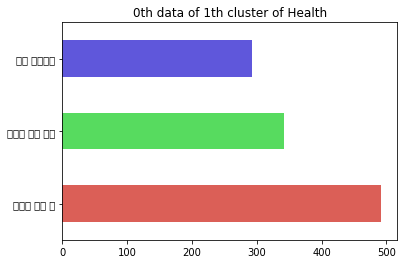

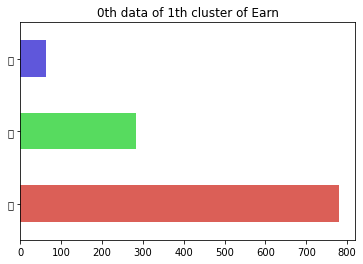

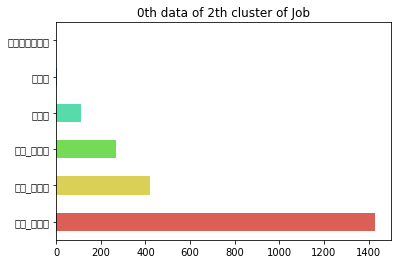

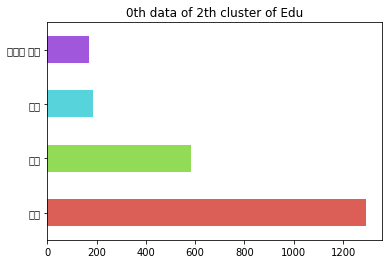

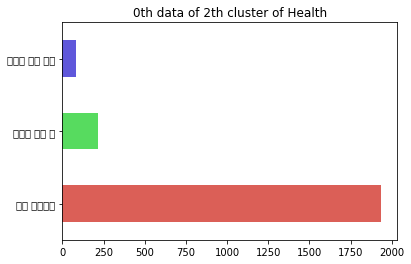

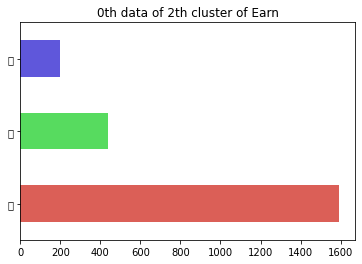

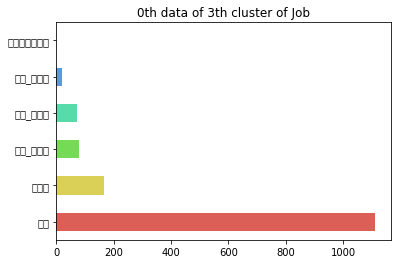

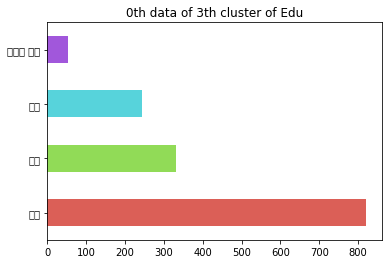

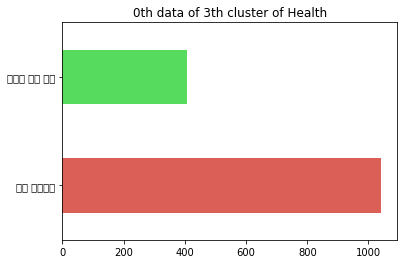

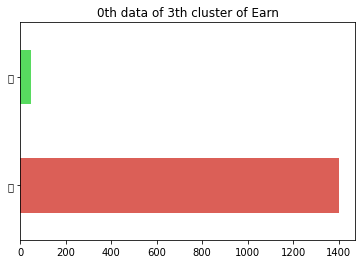

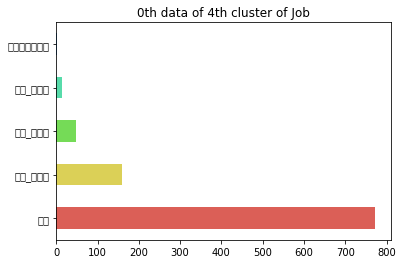

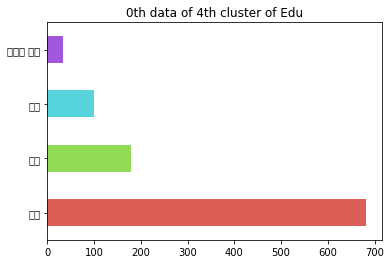

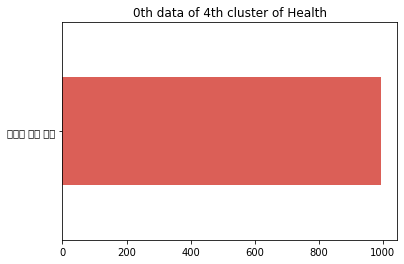

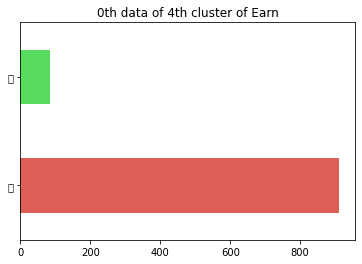

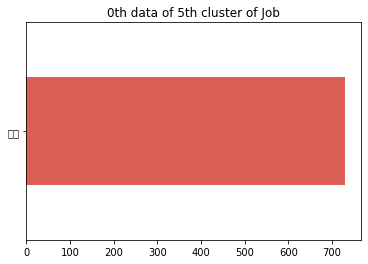

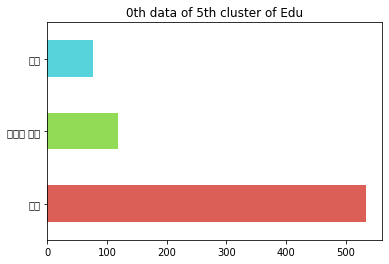

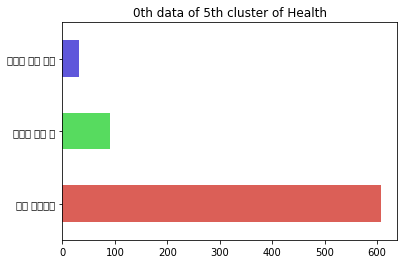

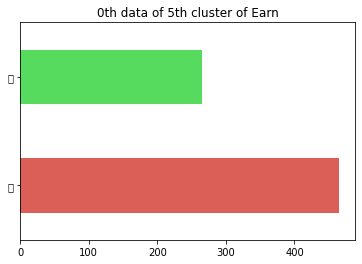

In [ ]:
cols = list(df1.drop(['Year', 'Cluster', 'Gender'], axis=1).columns)
for idx, data in enumerate(data_lst):
    for clus in range(0, 6):
        for col in cols:
            colors = sns.color_palette('hls',len(data[col].value_counts()))
            data[data['Cluster'] == clus].drop(['Year', 'Cluster'], axis=1)[col].value_counts().plot(kind='barh', color = colors)
            plt.title(f'{idx}th data of {clus}th cluster of {col}')
            plt.show()

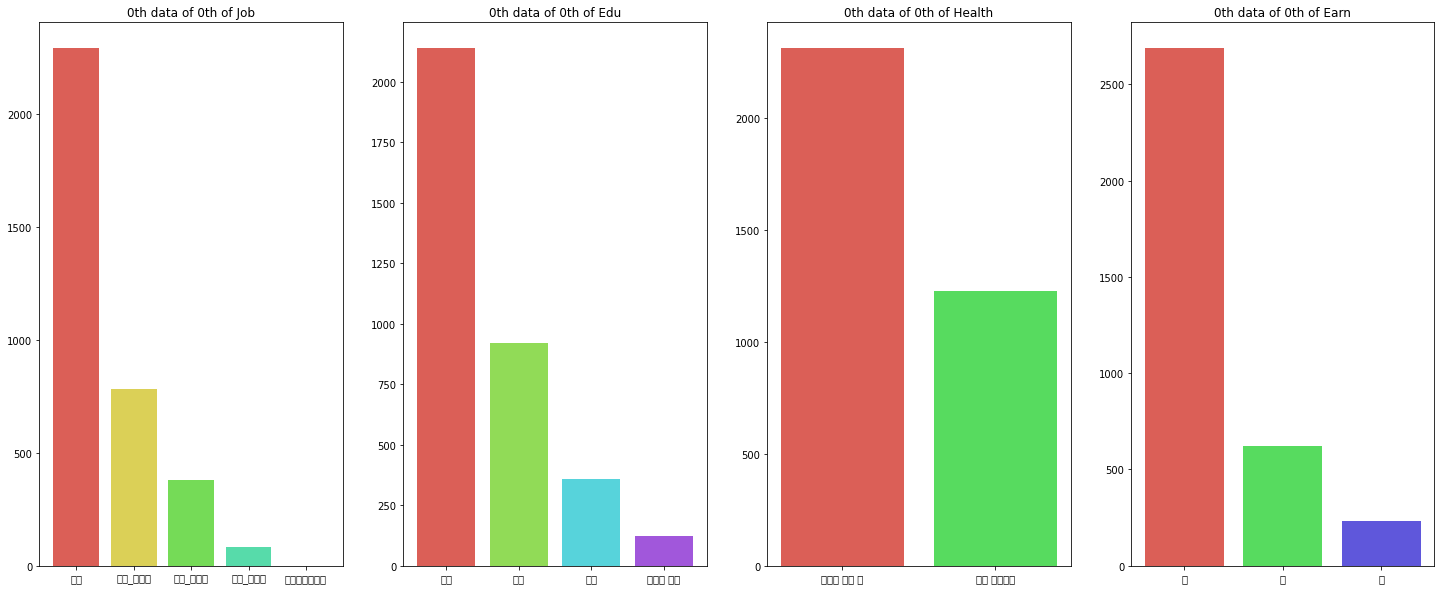

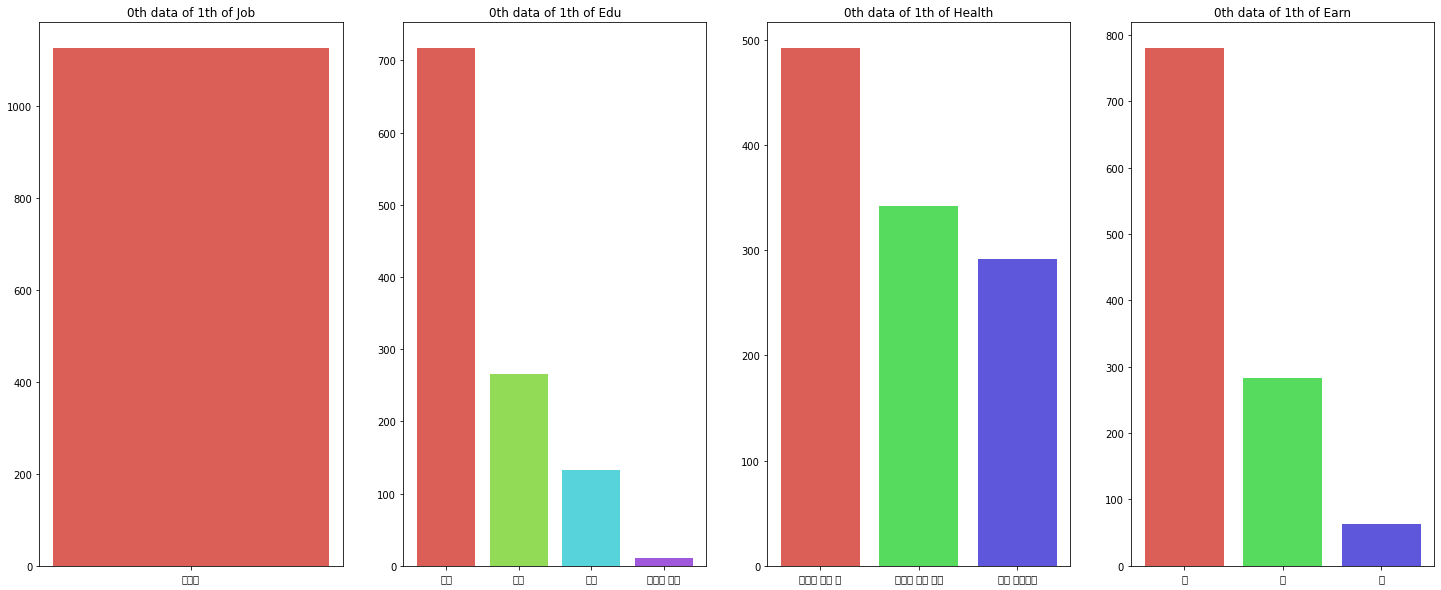

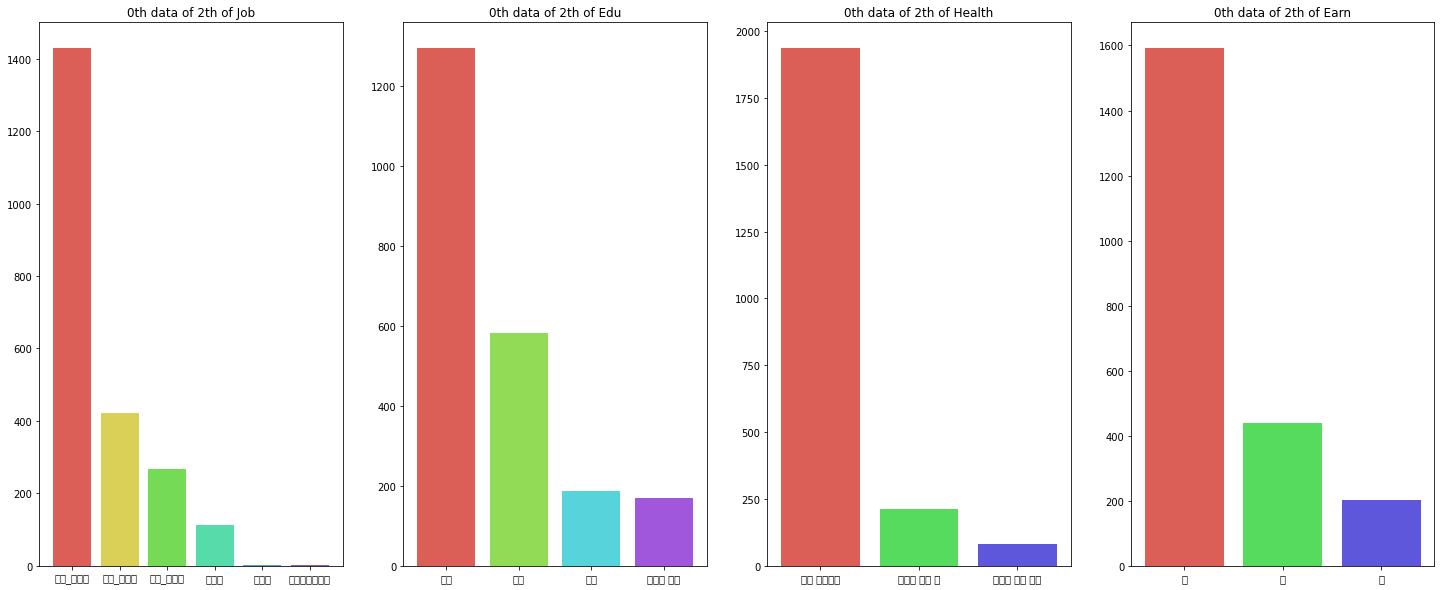

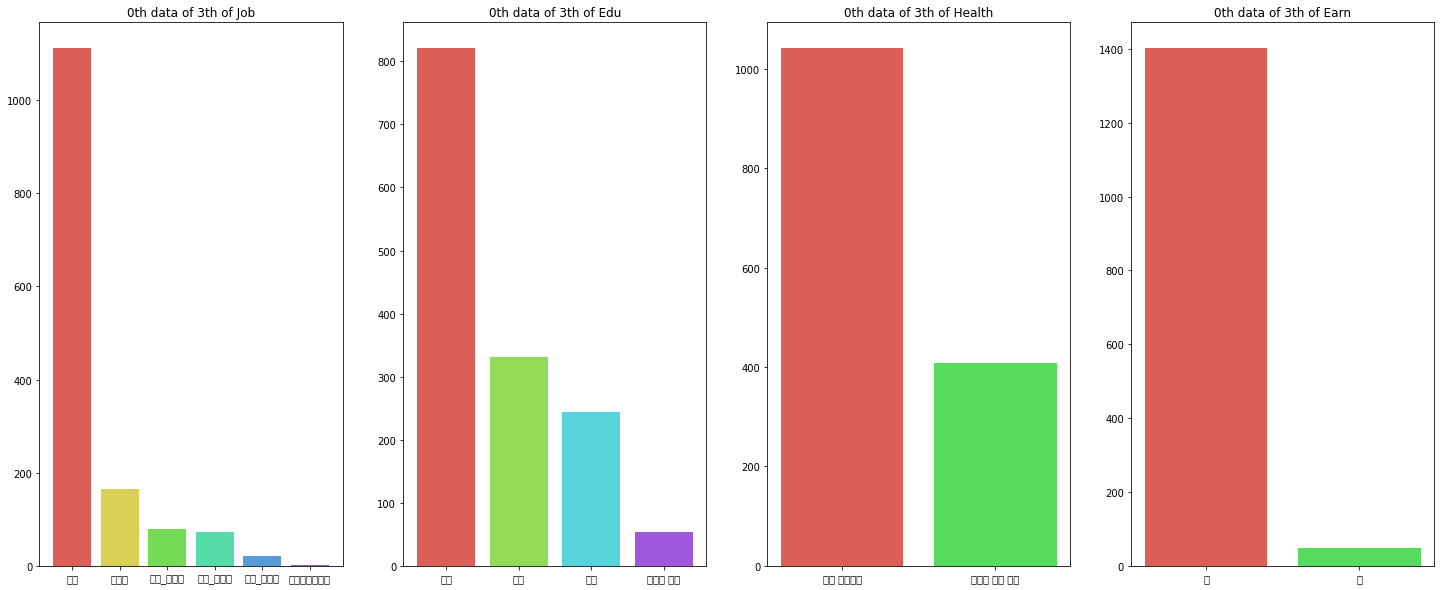

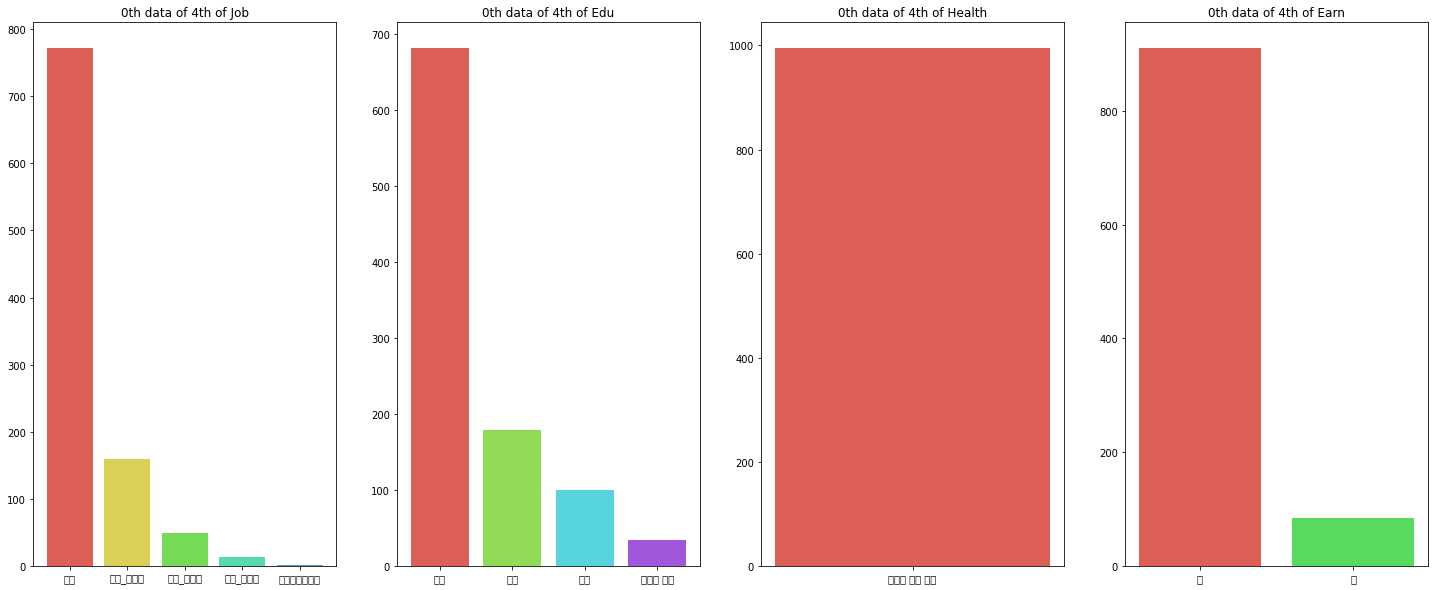

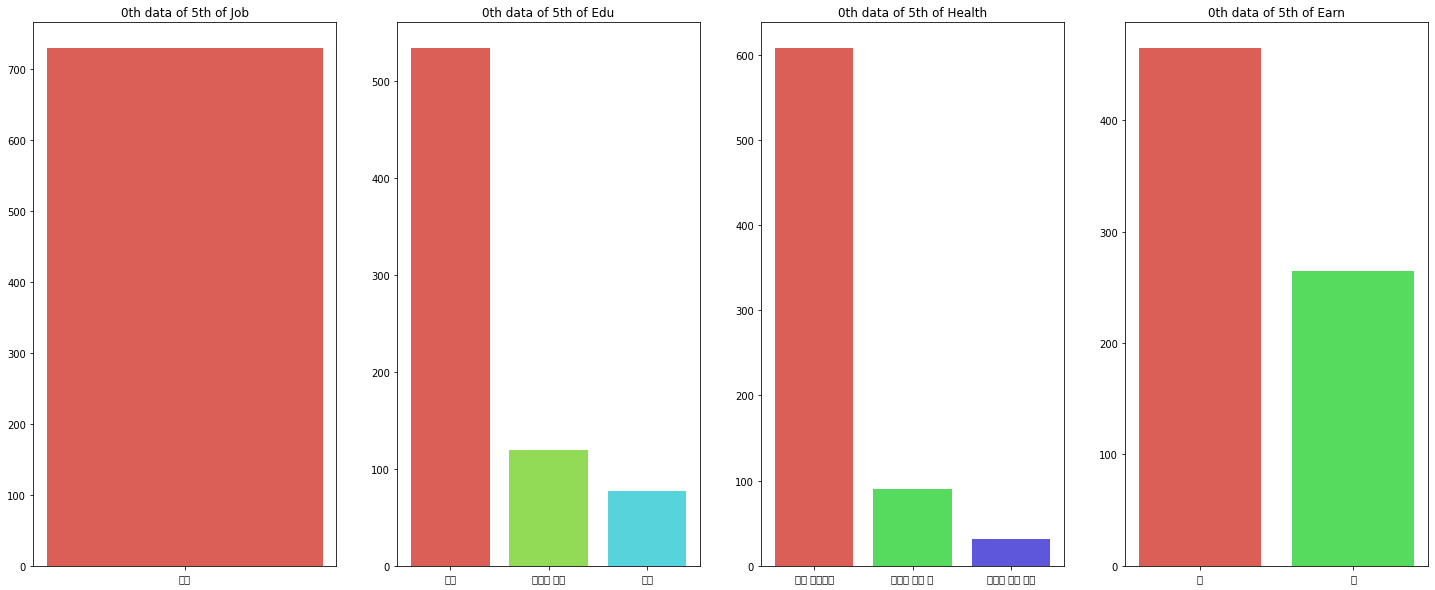

In [ ]:
for idx, data in enumerate(data_lst):
    for clus in range(0, 6):
        plt.figure(figsize=(25, 10))
        n = 1 
        for i, col in enumerate(cols):
            ax = plt.subplot(1, 4, n)
            colors = sns.color_palette('hls',len(data[col].value_counts()))
            temp = data[data['Cluster'] == clus].drop(['Year', 'Cluster'], axis=1)[col].value_counts()
            ax.bar(x = temp.index, height= temp.values, color = colors, axes= ax)
            plt.title(f'{idx}th data of {clus}th of {col}')
            n += 1
        plt.show()

<BarContainer object of 2 artists>

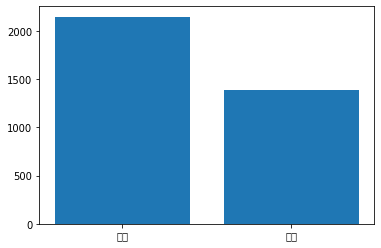

In [ ]:
x = df1[df1['Cluster'] == 0].drop(['Year', 'Cluster'], axis=1)['Gender'].value_counts().values
plt.bar(x = df1[df1['Cluster'] == 0].drop(['Year', 'Cluster'], axis=1)['Gender'].value_counts().index,height = x)

In [ ]:
years = list(df1['Year'].value_counts().index)
for year in years:
    df1[(df1['Cluster']==0) & (df1['Year']==year)].Job.value_counts(normalize=True)

In [ ]:
temp_data = df1[(df1['Cluster']==0) & (df1['Year']==2020)]
temp_data

,Gender,Job,Edu,Health,Earn,Cluster,Year
1,여자,임금_중숙련,초등,전혀 지장없음,중,0,2020
4,여자,임금_저숙련,초등,그렇지 않은 편,중,0,2020
5,여자,은퇴,초등,그렇지 않은 편,중,0,2020
9,여자,임금_저숙련,초등,전혀 지장없음,중,0,2020
11,여자,은퇴,중등,그렇지 않은 편,중,0,2020
...,...,...,...,...,...,...,...
10089,남자,임금_중숙련,중등,그렇지 않은 편,상,0,2020
10090,남자,은퇴,초등,전혀 지장없음,중,0,2020
10092,남자,은퇴,초등,그렇지 않은 편,중,0,2020
10093,남자,은퇴,초등,전혀 지장없음,중,0,2020


In [ ]:
print(temp_data.Job.value_counts().index)
print(temp_data.Job.value_counts(normalize=True).values)

Index(['은퇴', '임금_저숙련', '임금_중숙련', '임금_고숙련', '무급가족종사자'], dtype='object')
[6.47839593e-01 2.21688788e-01 1.06749506e-01 2.34397063e-02
 2.82406100e-04]


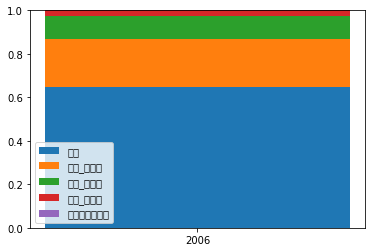

In [ ]:
temp = temp_data.Job.value_counts(normalize=True)
memory = 0
    
for i in range(len(temp)):
    if i == 0:
        plt.bar(x='2006', height=temp.values[i], label=temp.index[i])
    elif i == 1:
        plt.bar(x='2006', height=temp.values[i], label=temp.index[i],
                bottom = temp.values[i-1])
    else:
        plt.bar(x='2006', height=temp.values[i], label=temp.index[i],
                bottom = memory)        
    memory += temp.values[i]
    plt.legend()
    plt.ylim([0, 1.0])

(0.0, 1.0)

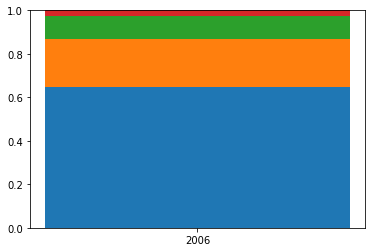

In [ ]:
plt.bar(x='2006',height=temp_data.Job.value_counts(normalize=True).values[0])
plt.bar(x='2006',height=temp_data.Job.value_counts(normalize=True).values[1], bottom=temp_data.Job.value_counts(normalize=True).values[0])
plt.bar(x='2006',height=temp_data.Job.value_counts(normalize=True).values[2], bottom=temp_data.Job.value_counts(normalize=True).values[0]+temp_data.Job.value_counts(normalize=True).values[1])
plt.bar(x='2006',height=temp_data.Job.value_counts(normalize=True).values[3], bottom=temp_data.Job.value_counts(normalize=True).values[0]+temp_data.Job.value_counts(normalize=True).values[1]+temp_data.Job.value_counts(normalize=True).values[2])
plt.ylim([0, 1.0])